In [1]:
#Reference from https://www.tensorflow.org/tutorials/keras/classification
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
70,000 grayscale images -> 60,000 train, 10,000 test
10 categories
28*28 pixels (0-255)
"""


"""
Class name
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

#Generate the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_dataset, train_labels),(test_dataset, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Shape of the train_dataset = (60000, 28, 28)
Shape of the test_dataset = (10000, 28, 28)
Shape of the train_labels = (60000,)
Shape of the test_labels = (10000,)


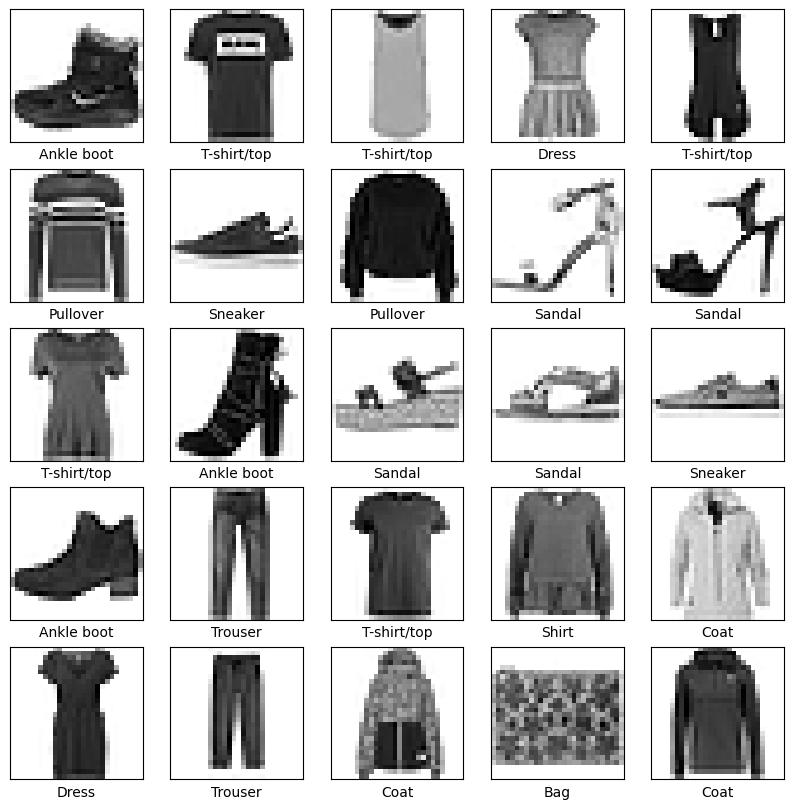

In [3]:
#Exploring the data
print(f'Shape of the train_dataset = {train_dataset.shape}')
print(f'Shape of the test_dataset = {test_dataset.shape}')
print(f'Shape of the train_labels = {train_labels.shape}')
print(f'Shape of the test_labels = {test_labels.shape}')



class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Show first 25 train datasets with labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_dataset[i], cmap = plt.cm.binary) #Gray color map
    plt.xlabel(class_names[train_labels[i]])
plt.show()




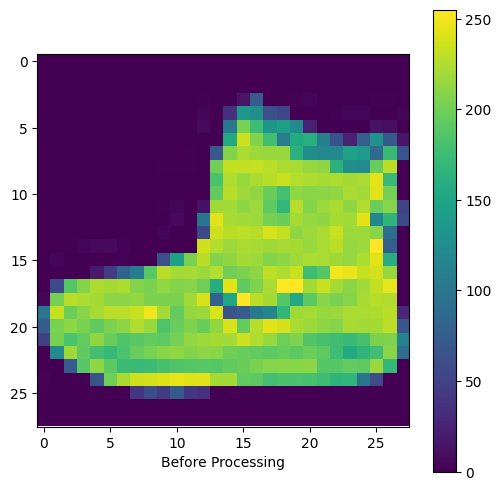

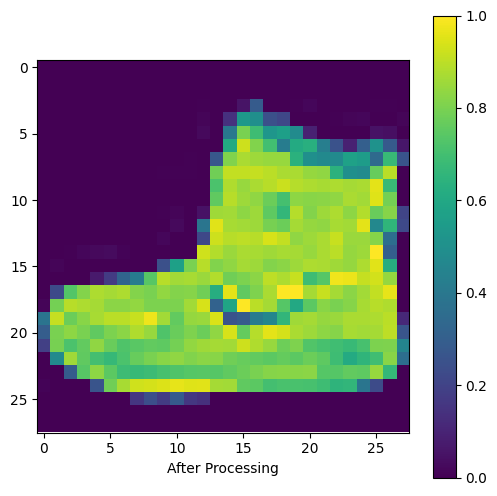

In [4]:
#Data Processing
plt.figure(figsize=(6,6))
plt.imshow(train_dataset[0])
plt.colorbar()
plt.xlabel("Before Processing")
plt.grid(False)



"""
Note:
Image value [0,255]
Keras model only accept value from [0,1]

"""

train_dataset = train_dataset/255.0
test_dataset = test_dataset/255.0



plt.figure(figsize=(6,6))
plt.imshow(train_dataset[0])
plt.colorbar()
plt.xlabel("After Processing")
plt.grid(False)
plt.show()

In [5]:
#Build model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), #match input size
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax') #To produce probability output

])


#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Plot model
model.summary()
#from tensorflow.keras.utils import plot_model
#plot_model(model,show_shapes = True, show_layer_names = True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
#Train the model
model.fit(train_dataset, train_labels, epochs= 10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 11s 5ms/step - loss: 0.4912 - accuracy: 0.8266
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3727 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3382 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3131 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2950 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2794 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2682 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2566 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2481 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2389 - accura

In [7]:
#Evaluation accuracy
test_loss, test_acc = model.evaluate(test_dataset, test_labels,verbose = 2)
print("\nTest accuracy:",test_acc)

"""
verbose
0:nothiing  1:progress bar + detailed inf  2:detailed inf
"""

313/313 - 1s - loss: 0.3288 - accuracy: 0.8875 - 557ms/epoch - 2ms/step

Test accuracy: 0.887499988079071


'\nverbose\n0:nothiing  1:progress bar + detailed inf  2:detailed inf\n'

313/313 [==============================] - 1s 1ms/step


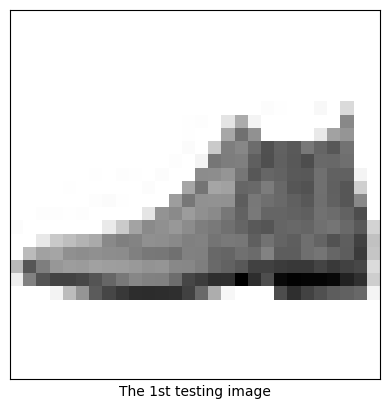

The predications array of the 1st image: [2.3366654e-07 2.3054449e-08 3.1394728e-07 1.2897083e-07 1.1926345e-06
 4.2623541e-04 4.7520004e-07 3.2686137e-02 5.0486318e-07 9.6688479e-01]
The 1st image is most likely to be in class 9, which is Ankle boot


In [8]:
#Make predication

probability_model = model
predictions = probability_model.predict(test_dataset)
#probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()]) #late add of activation function


#Explore prediction
plt.imshow(test_dataset[0],cmap = plt.cm.binary)
plt.xlabel("The 1st testing image")
plt.xticks([])
plt.yticks([])
plt.show()

print("The predications array of the 1st image:",predictions[0])
print(f'The 1st image is most likely to be in class {np.argmax(predictions[0])}, which is {class_names[np.argmax(predictions[0])]}')

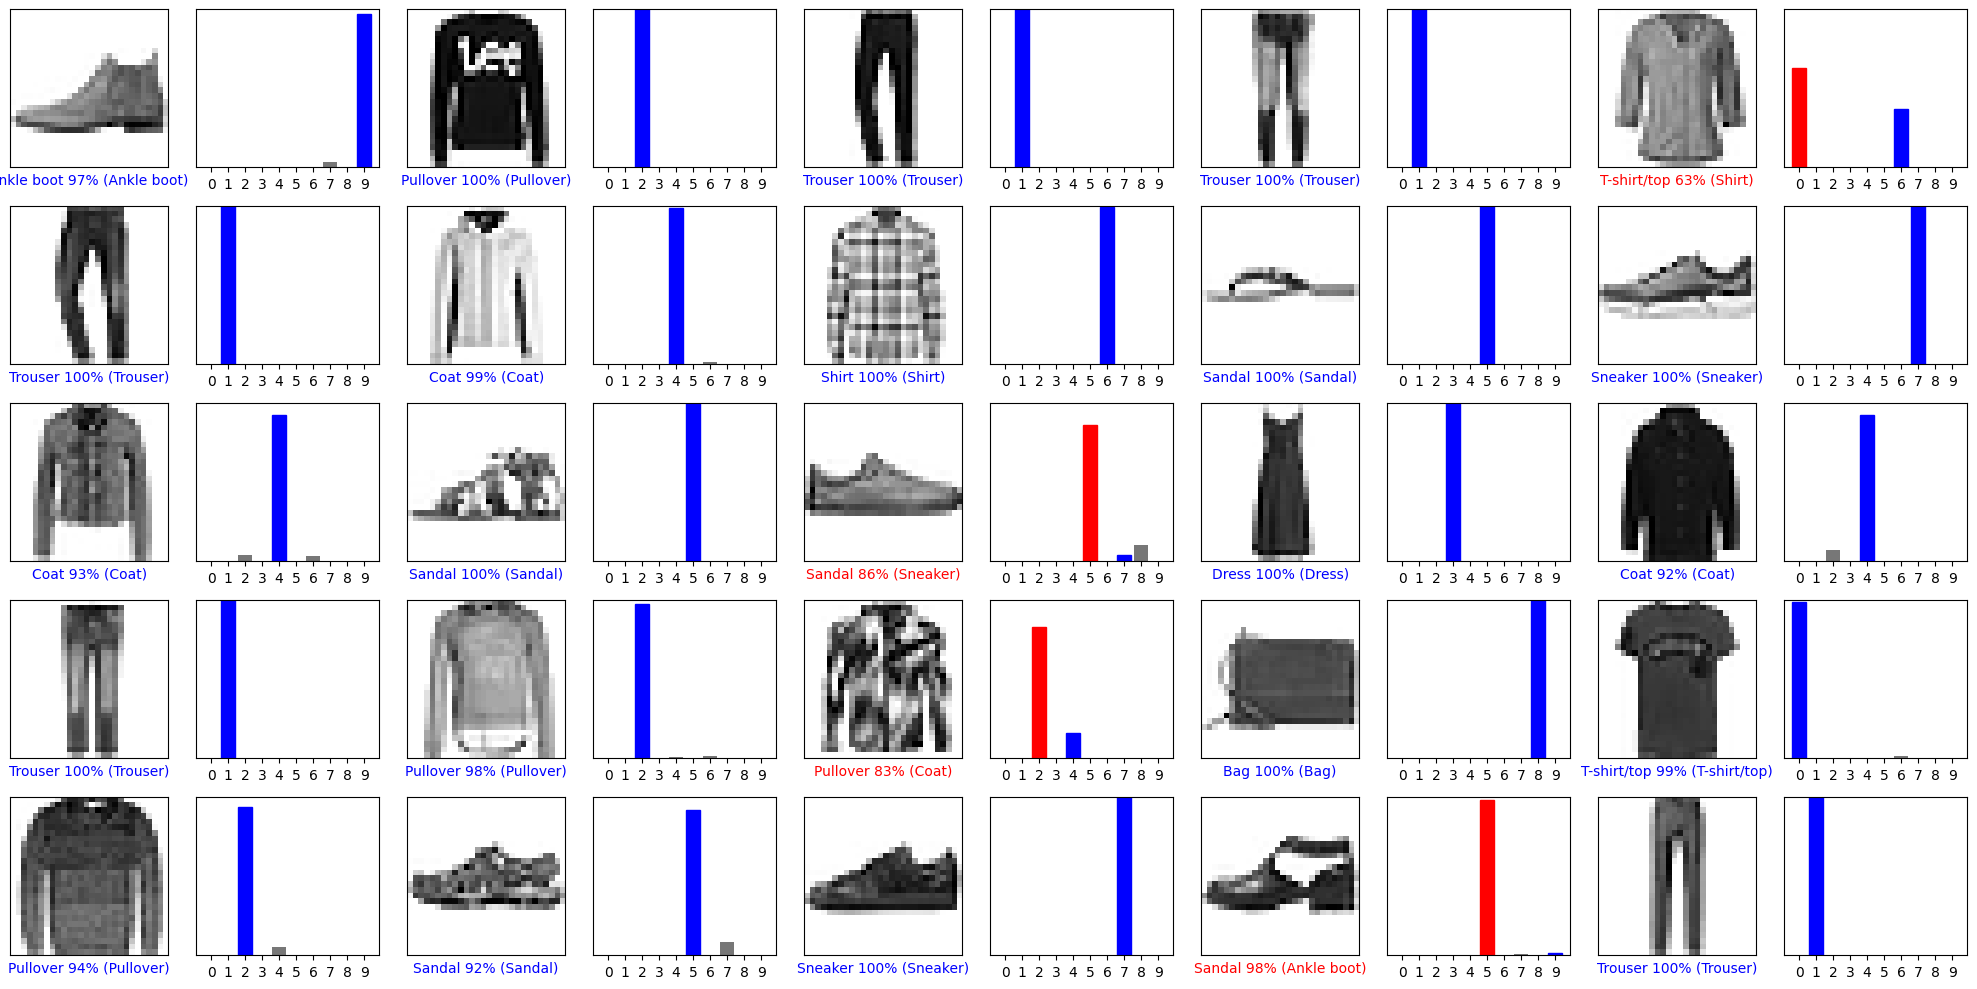

In [27]:
#Function for verification
def plot_image(index, predictions_array, true_labels,imgs):
    true_label, img = true_labels[index], imgs[index] #Extract the image & it's true label from the testing dataset
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    color = 'blue' if (predicted_label == true_label) else 'red' #True:blue, False: Red


    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], #predicted label
                                100*np.max(predictions_array), #Confidence
                                class_names[true_label]), #Actual label
                                color=color) #Correct/Wrong

def plot_value_array(i,predictions_array, true_labels):
    true_label = true_labels[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])

    thisplot = plt.bar(range(10),predictions_array, color = "#777777")
    plt.ylim([0,1])

    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions[i], test_labels, test_dataset)

    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)

plt.tight_layout() #automatic adjust subplot parameter
plt.show()

In [28]:
#Save model
"""
from google.colab import drive
drive.mount("/content/drive/")
%cd "/content/drive/MyDrive/Colab Notebooks/Self-study2"


model_name = 'keras.h5'
model.save(model_name,save_format = 'h5')
"""

'\nfrom google.colab import drive\ndrive.mount("/content/drive/")\n%cd "/content/drive/MyDrive/Colab Notebooks/Self-study2"\n\n\nmodel_name = \'keras.h5\'\nmodel.save(model_name,save_format = \'h5\')\n'

1/1 [==============================] - 0s 21ms/step


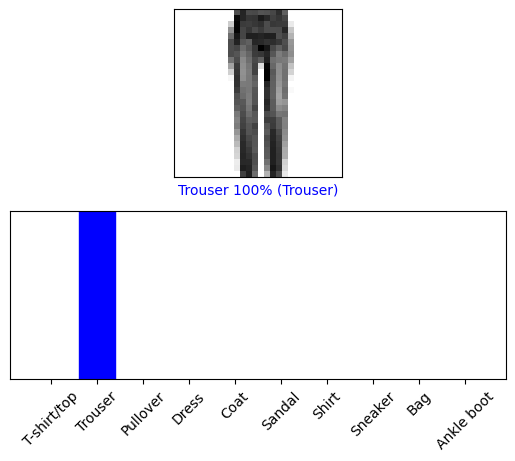

In [29]:
#load_modal
"""
from keras.models import load_model
probability_model = load_model("keras_high.h5")
"""

#Use the trained model
from random import randint

image_index = randint(0,test_dataset.shape[0])

img = test_dataset[image_index];
img = np.expand_dims(img,0)

single_predictions_array = probability_model.predict(img)

"""
Note: keras model only accept 3 dimension image
"""


plt.subplot(2,1,1)
plot_image(image_index, single_predictions_array, test_labels,test_dataset)

plt.subplot(2,1,2)
plot_value_array(image_index,single_predictions_array[0,:],test_labels)
plt.xticks(range(10),class_names, rotation=45)

plt.show()

